# PHÂN TÍCH THÀNH PHẦN CHÍNH PCA 

## CHUẨN HÓA DỮ LIỆU 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../../data/data_processed/data_processed.csv")

X = df.drop("NSP", axis=1)
y = df["NSP"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## GIẢM CHIỀU PCA 

In [2]:
#chuẩn hóa dữ liệu
X = (X - X.mean()) / X.std(ddof=0)
#ma trận hiệp phương sai S 
X_corr = (1 / 2126) * X.T.dot(X)

#tính giá trị riêng và vector riêng của ma trận S 
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([6.02627418e+00, 3.48319734e+00, 1.83074412e+00, 1.48817708e+00,
        1.16051696e+00, 1.03809551e+00, 9.53627128e-01, 8.71509149e-01,
        7.54932878e-01, 6.68139605e-01, 6.12052765e-01, 4.97446306e-01,
        4.06430943e-01, 3.37009468e-01, 2.81554254e-01, 2.42368112e-01,
        1.45619440e-01, 1.26390099e-01, 4.94577918e-02, 2.64568714e-02,
        6.63903781e-17]),
 array([[-2.24372188e-01,  2.86660643e-01,  3.12393143e-01,
         -1.49997959e-01, -3.04027916e-02,  1.11152462e-01,
          5.33511791e-02, -2.75386738e-01,  1.26570280e-01,
          1.48103062e-01,  3.02760468e-03,  1.20868046e-01,
         -2.73825123e-02,  1.57351189e-01,  1.73859047e-02,
         -4.58883341e-02,  6.33171754e-01,  2.64237342e-01,
          3.17044375e-01, -6.07909581e-02,  9.69256481e-17],
        [ 5.08991266e-02,  2.61029310e-01, -7.96862653e-02,
          4.95521434e-01,  5.18676020e-02, -1.04041411e-01,
         -2.30967404e-01,  3.74774848e-01, -2.52153603e-01,
         -3.6

## TRỰC QUAN HÓA CHO TỪNG CẶP THÀNH PHẦN CHÍNH 

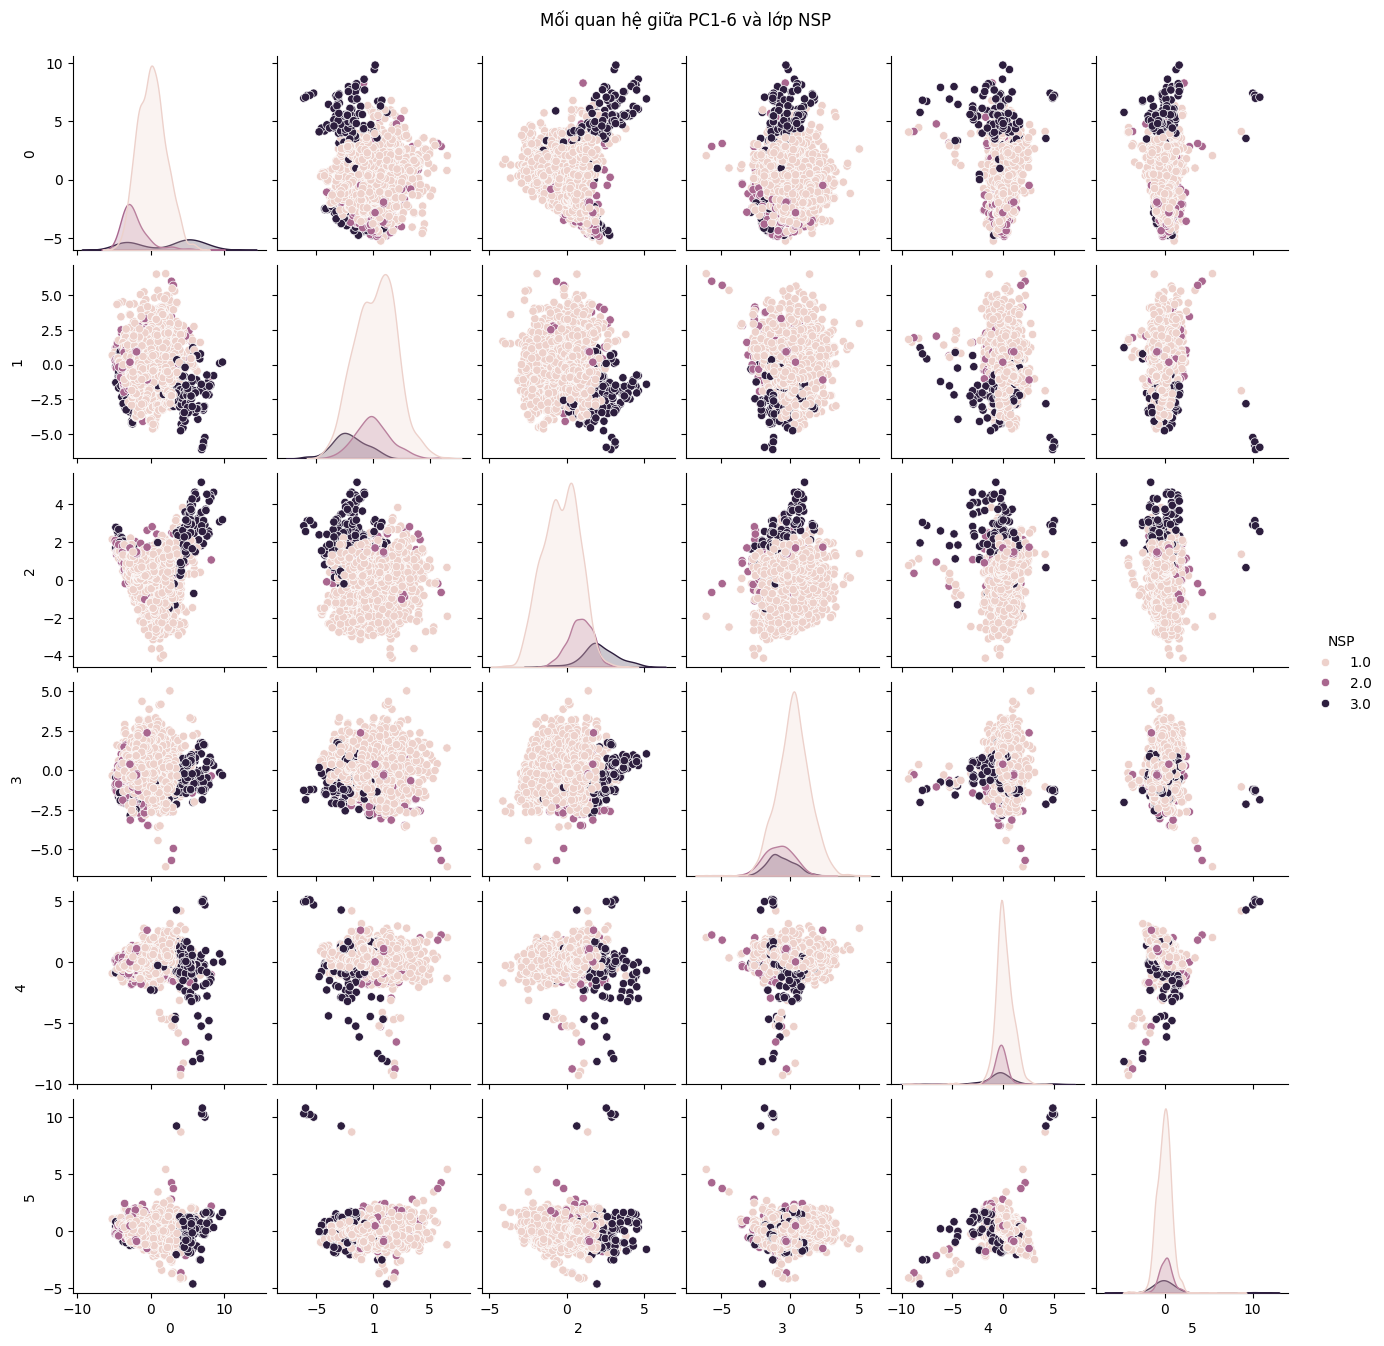

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# Chiếu dữ liệu vào không gian mới gồm 6 thành phần chính đầu 
PCs = X.dot(eig_vectors[:, :6])

PCs['NSP'] = df['NSP']

# Trực quan hóa tương quan giữa PC1-PC6
sns.pairplot(PCs, hue="NSP", diag_kind='kde', height=2.2)
plt.suptitle("Mối quan hệ giữa PC1-6 và lớp NSP", y=1.02)
plt.show()

## Xác định lượng thông tin được bảo tồn theo phương sai giải thích 

Text(0.5, 0, 'Số thành phần chính')

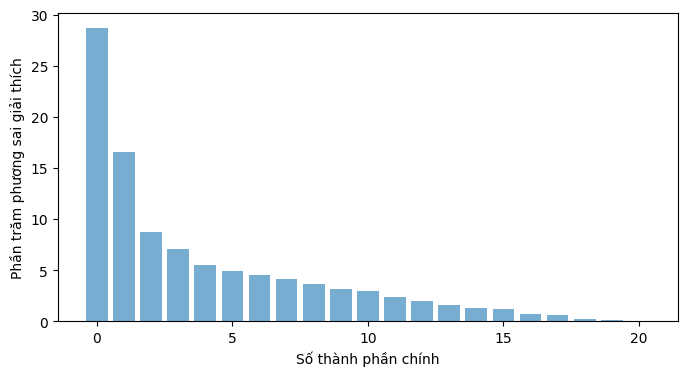

In [4]:
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(21), explained_variance, alpha=0.6)
plt.ylabel('Phần trăm phương sai giải thích')
plt.xlabel('Số thành phần chính')

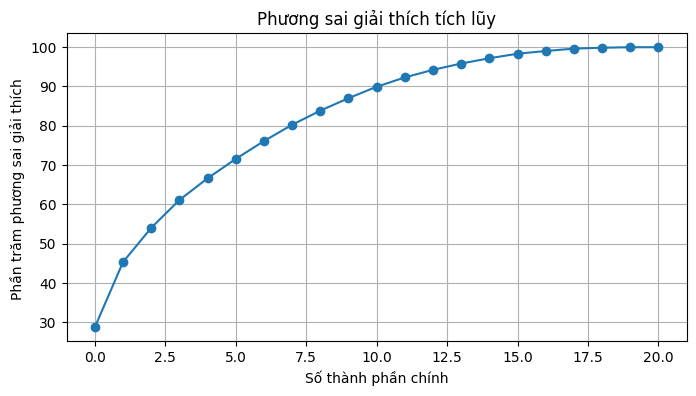

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title("Phương sai giải thích tích lũy")
plt.xlabel("Số thành phần chính")
plt.ylabel("Phần trăm phương sai giải thích ")
plt.grid()
plt.show()

## Trực quan hóa mối quan hệ giữa một số chiều dữ liệu chính với đầu ra để xem xét khả năng có tương quan hay hình thành cụm dữ liệu 

## Giảm chiều dữ liệu 

In [8]:
cumulative_variance = np.cumsum(explained_variance)

print(f"Số lượng thành phần chính cần để giải thích ≥ 90% phương sai: {np.argmax(cumulative_variance >= 90) + 1}")

Số lượng thành phần chính cần để giải thích ≥ 90% phương sai: 12


In [10]:
#Chiếu tất cả dữ liệu xuống 12 thành phần chính đầu tiên
pca_all = X.dot(eig_vectors[:, :12])

pca_all['NSP'] = df['NSP'].values

print(pca_all.head())

          0         1         2         3         4         5         6  \
0 -0.226455 -2.539655  0.807759 -2.036000  0.303001 -1.260063 -0.948846   
1  1.824227  2.069910 -1.078830  0.384448 -0.222901  1.135646  0.711216   
2  1.798579  1.870376 -1.288884  0.151288 -0.166219  1.235572  0.933550   
3  2.090169  2.051745 -2.452756 -1.115952  0.197209 -0.370080  0.094588   
4  1.658941  1.946450 -2.562191 -0.633367 -0.037464 -0.367568 -0.152777   

          7         8         9        10        11  NSP  
0  1.805642 -0.228044  0.698881  0.285480 -1.194089  2.0  
1  0.148141 -0.208375 -0.076079 -0.523255 -0.238240  1.0  
2 -0.487771  0.154662 -0.263560 -0.562348 -0.264734  1.0  
3 -0.582912  1.773332 -0.911333 -0.238747 -0.952853  1.0  
4 -0.049804  1.367139 -0.452637  0.163374 -1.078231  1.0  


In [11]:
#lưu file csv 
pca_all.to_csv("../../data/dimension_reduction/pca/pca_all.csv")

## Chia dữ liệu train-test theo tỷ lệ 4:1, 7:3, 6:4 giảm chiều trên tập train rồi chiếu trên tập test 

In [12]:
from sklearn.model_selection import train_test_split

def split_and_pca(X, y, test_size, n_components=12):
    # Chia dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Chuẩn hóa theo tập train
    X_train_std = (X_train - X_train.mean()) / X_train.std(ddof=0)
    X_test_std = (X_test - X_train.mean()) / X_train.std(ddof=0)  

    # Tính ma trận hiệp phương sai của tập train
    S_train = (1 / len(X_train_std)) * X_train_std.T.dot(X_train_std)

    # Tính giá trị riêng và vector riêng bằng SVD
    u, s, v = np.linalg.svd(S_train)
    eig_vectors_train = u[:, :n_components]

    # Chiếu dữ liệu train và test
    X_train_pca = X_train_std.dot(eig_vectors_train)
    X_test_pca = X_test_std.dot(eig_vectors_train)

    # Ghép với nhãn
    X_train_pca['NSP'] = y_train.values
    X_test_pca['NSP'] = y_test.values

    return X_train_pca, X_test_pca

In [14]:
#Tỷ lệ 4:1 
train_80, test_20 = split_and_pca(X, y, test_size=0.2)
train_80.to_csv("../../data/dimension_reduction/pca/train_80.csv")
test_20.to_csv("../../data/dimension_reduction/pca/test_20.csv")

#Tỷ lệ 7:3 
train_70, test_30 = split_and_pca(X, y, test_size=0.3)
train_70.to_csv("../../data/dimension_reduction/pca/train_70.csv")
test_30.to_csv("../../data/dimension_reduction/pca/test_30.csv")

#Tỷ lệ 6:4 
train_60, test_40 = split_and_pca(X, y, test_size=0.4)
train_60.to_csv("../../data/dimension_reduction/pca/train_60.csv")
test_40.to_csv("../../data/dimension_reduction/pca/test_40.csv")